In [6]:
from random import random
from math import sin

from pathlib import Path

# filename = "dataplacespace.txt"
filename = Path("..", "data", "dataplacespace.txt")

# grain1 = 100
# grain2 = 150

freqs = [100, 150, 200]
amps = [1, 1.2, 1.4]

# with open(filename, "a") as f:
#     f.write("")

for freq in freqs:
    for amp in amps:
        for ix in range(1000):
            # result = random()
            result = amp * sin(ix / freq)
            # result2 = sin(ix / grain2)
            with open(filename, 'a') as f:
                # dataline = str(ix) + "," + str(result) + "," + str(result2) + "\n"
                dataline = f"{ix}, {freq}, {amp}, {result} \n"
                f.write(dataline)

In [7]:
import pandas as pd

data = pd.read_csv(filename, names=["ID", "Freq", "Amp", "Result"])
print(data)

       ID  Freq  Amp    Result
0       0   100  1.0  0.000000
1       1   100  1.0  0.010000
2       2   100  1.0  0.019999
3       3   100  1.0  0.029996
4       4   100  1.0  0.039989
...   ...   ...  ...       ...
8995  995   200  1.4 -1.352002
8996  996   200  1.4 -1.350168
8997  997   200  1.4 -1.348300
8998  998   200  1.4 -1.346398
8999  999   200  1.4 -1.344463

[9000 rows x 4 columns]


In [8]:
data[data["Freq"] == 200]

,ID,Freq,Amp,Result
6000,0,200,1.0,0.000000
6001,1,200,1.0,0.005000
6002,2,200,1.0,0.010000
6003,3,200,1.0,0.014999
6004,4,200,1.0,0.019999
...,...,...,...,...
8995,995,200,1.4,-1.352002
8996,996,200,1.4,-1.350168
8997,997,200,1.4,-1.348300
8998,998,200,1.4,-1.346398


In [9]:
freqs = set(data["Freq"])
# data["Freq"]
freqs

{100, 150, 200}

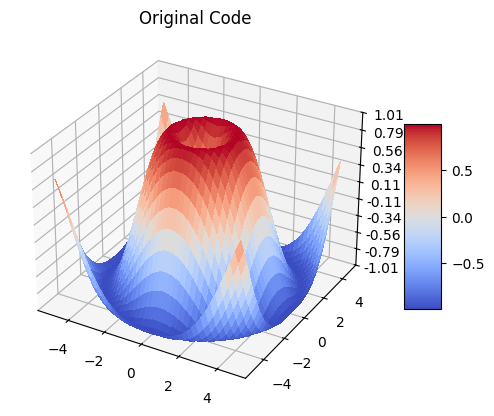

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

## Matplotlib Sample Code using 2D arrays via meshgrid
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)
# fig = plt.figure()
# ax = Axes3D(fig)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

In [11]:
data["Result"]
data["Freq"]

0       100
1       100
2       100
3       100
4       100
       ... 
8995    200
8996    200
8997    200
8998    200
8999    200
Name: Freq, Length: 9000, dtype: int64

Text(0.5, 0, 'Result')

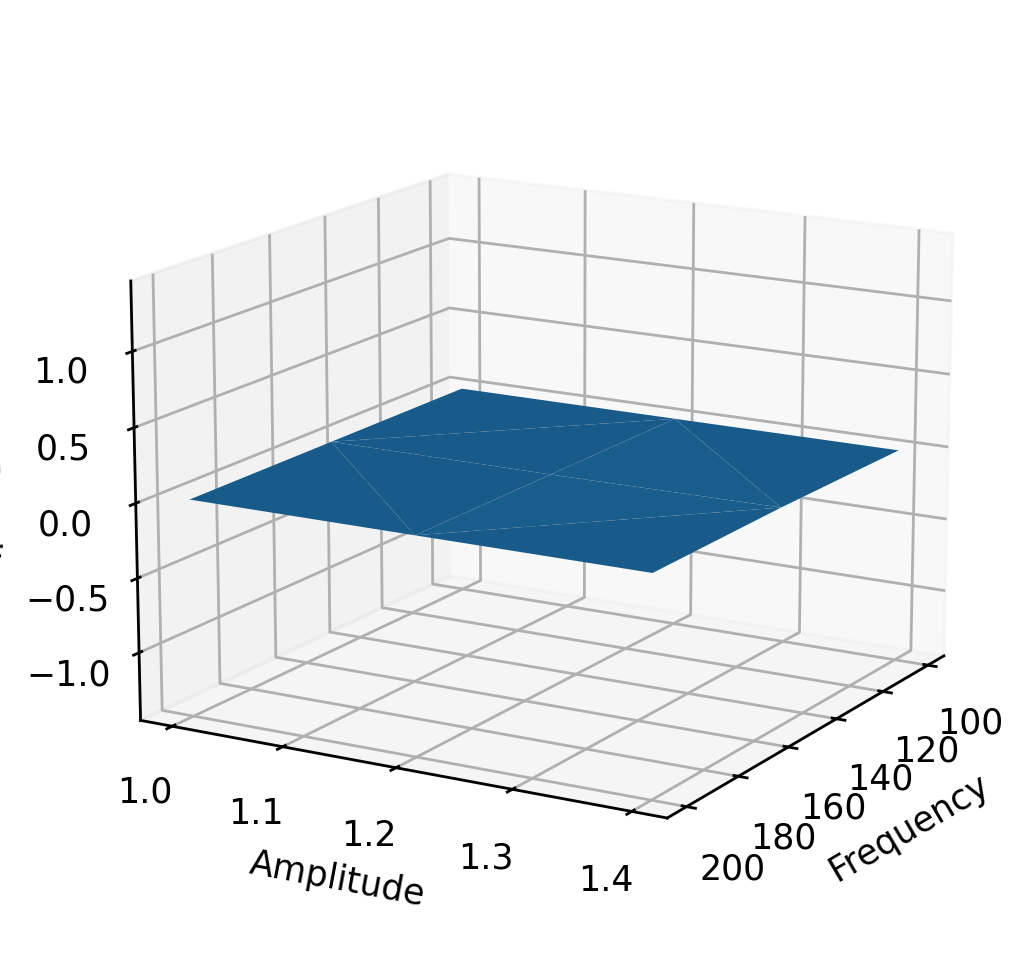

In [12]:
fig, ax = plt.subplots(
    subplot_kw={"projection": "3d"},
    dpi=250,
)
# fig, ax = plt.subplots()

# X = data["Freq"].values
# Y = data["Amp"].values
# Z = data["Result"].values
# ax.plot_trisurf(X, Y, Z)
ax.view_init(15,30,0)
ax.plot_trisurf(
    data["Freq"].values,
    data["Amp"].values,
    data["Result"].values,
)
ax.set_xlabel("Frequency")
ax.set_ylabel("Amplitude")
ax.set_zlabel("Result")
# ax.set_xlim([-1.5, 1.5])
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)



In [13]:
data["Freq"]

0       100
1       100
2       100
3       100
4       100
       ... 
8995    200
8996    200
8997    200
8998    200
8999    200
Name: Freq, Length: 9000, dtype: int64

/var/folders/2j/bnnyj3h94rl7vvpbwz1n1n8c0000gn/T/ipykernel_50767/1498379457.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_data = data[data["Freq"] == freq][data["Amp"] == amp]
/var/folders/2j/bnnyj3h94rl7vvpbwz1n1n8c0000gn/T/ipykernel_50767/1498379457.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_data = data[data["Freq"] == freq][data["Amp"] == amp]
/var/folders/2j/bnnyj3h94rl7vvpbwz1n1n8c0000gn/T/ipykernel_50767/1498379457.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_data = data[data["Freq"] == freq][data["Amp"] == amp]
/var/folders/2j/bnnyj3h94rl7vvpbwz1n1n8c0000gn/T/ipykernel_50767/1498379457.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  local_data = data[data["Freq"] == freq][data["Amp"] == amp]
/var/folders/2j/bnnyj3h94rl7vvpbwz1n1n8c0000gn/T/ipykernel_50767/1498379457.py:10: UserWarning: Boolean Series key w

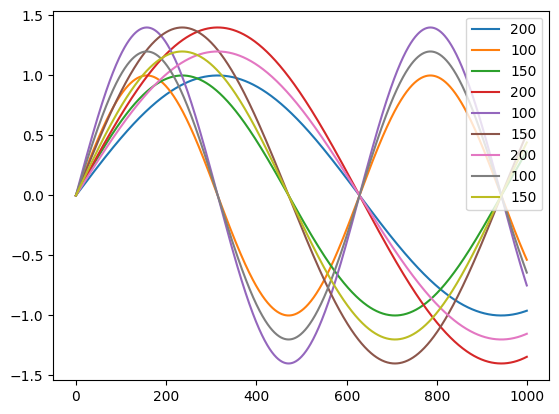

In [14]:
import matplotlib.pyplot as plt

# p = plt.plot()
fig, ax = plt.subplots()

freqs = set(data["Freq"])
amps = set(data["Amp"])
for amp in amps:
    for freq in freqs:
        local_data = data[data["Freq"] == freq][data["Amp"] == amp]
        # local_data = local_data[data["Amp"] == amp]
        ax.plot(
            local_data["ID"],
            local_data["Result"],
            label=str(freq)
        )
ax.legend(loc="upper right")
plt.show()

In [15]:
import numpy as np
from sklearn.datasets import load_iris, make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from artlib import FuzzyART, SimpleARTMAP, QuadraticNeuronART

# def cluster_iris():

def cluster_blobs():
    data, target = make_blobs(
        n_samples=1000,
        centers=3,
        cluster_std=1.0,
        random_state=0,
        shuffle=False,
    )
    print("Data has shape:", data.shape)

    params = {"rho": 0.9, "alpha": 0.0, "beta": 1.0}
    art = FuzzyART(**params)

    # params = {
    #     "rho": 0.0,
    #     "s_init": 0.9,
    #     "lr_b": 0.1,
    #     "lr_w": 0.1,
    #     "lr_s": 0.1
    # }
    # art = QuadraticNeuronART(**params)

    X = art.prepare_data(data)
    print("Prepared data has shape:", X.shape)

    X_train, X_test, y_train, y_test = train_test_split(
        X, target, test_size=0.2, random_state=42
    )

    cls = SimpleARTMAP(art)

    cls = cls.fit(X_train, y_train)
    y_hat_train = cls.labels_

    y = cls.predict(X_test)

    print(f"{cls.module_a.n_clusters} clusters found")

    cls.visualize(X_train, y_hat_train)
    # print(target)
    # print(y)

    acc = sum(a == b for a, b in zip(y_test, y)) / len(y_test)
    print(f"Accuracy: {acc}")
    plt.show()


# def main():
#     # cluster_iris()
#     cluster_blobs()


# if __name__ == "__main__":
#     main()


In [16]:
from pathlib import Path

In [17]:
type(data), type(target)

NameError: name 'target' is not defined

In [18]:
acc = sum(a == b for a, b in zip(y_test, y_pred)) / len(y_test)
print(f"Accuracy: {acc}")
plt.show()

NameError: name 'y_test' is not defined

In [19]:
art.W
# art.map
cls.map

NameError: name 'art' is not defined

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import umap.plot

data, target = load_iris(return_X_y=True)
print("Data has shape:", data.shape)

params = {"rho": 0.9, "alpha": 0.001, "beta": 0.5}
art = FuzzyART(**params)
# params = {
#     "rho": 0.0,
#     "s_init": 0.9,
#     "lr_b": 0.1,
#     "lr_w": 0.1,
#     "lr_s": 0.1
# }
# art = QuadraticNeuronART(**params)

X = art.prepare_data(data)

X_train, X_test, y_train, y_test = train_test_split(
    X, target, test_size=0.33, random_state=0
)

print("Prepared data has shape:", X.shape)

cls = SimpleARTMAP(art)

cls = cls.fit(X_train, y_train)

print(f"{len(np.unique(cls.labels_a))} clusters found")

y_pred = cls.predict(X_test)

print(classification_report(y_test, y_pred))

mapper = umap.UMAP().fit(X_test)

umap.plot.points(
    mapper, labels=y_pred, color_key_cmap="Paired", background="black"
)
umap.plot.plt.show()



ModuleNotFoundError: No module named 'umap.plot'